Train data (60000, 1, 28, 28)
Train labels (60000,)
Test data (10000, 1, 28, 28)
Test labels (10000,)
Training started...
epoch		time		CE Loss		Test Acc
1		605.99s		17542.15		95.46%
2		589.58s		5462.97		97.21%
3		598.49s		3332.42		97.13%
4		605.00s		2449.49		97.25%
5		637.65s		1991.76		97.68%
Training completed.
Test Accuracy: 97.68%
Test Loss:  865.9249523882614


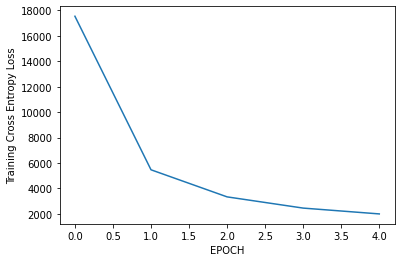

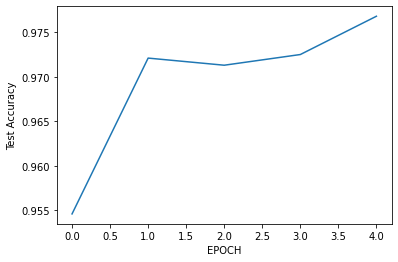

Training Time Taken:  3036.7085106372833
Layer type		Input size			Output size
Normalize		(28, 28)			(28, 28)
Vectorizer		(28, 28)			(1, 784)
MatrixMult		(1, 784)			(1, 1000)
Addition		(1, 1000)			(1, 1000)
ReLUActi		0			0
MatrixMult		(1, 1000)			(1, 100)
Addition		(1, 100)			(1, 100)
ReLUActi		0			0
MatrixMult		(1, 100)			(1, 10)
Addition		(1, 10)			(1, 10)
SoftMaxActi		0			0


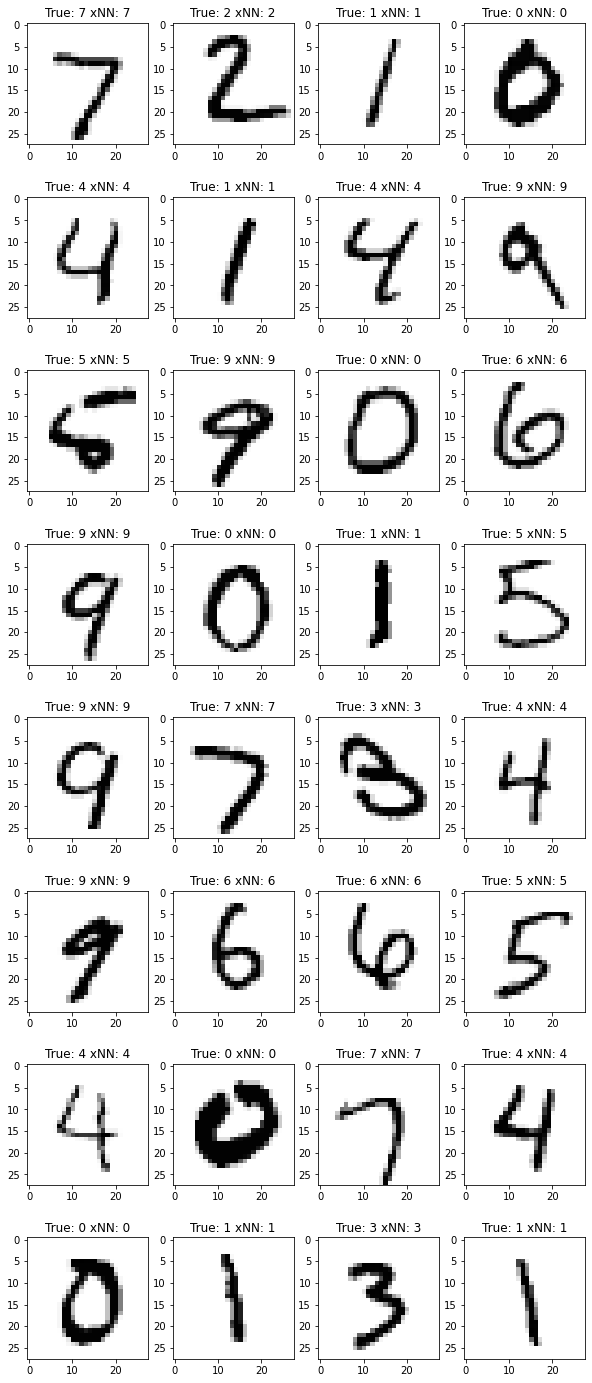

In [5]:
################################################################################
#
# LOGISTICS
#
#    Rajarshi Chattopadhyay
#    RXC170010
#
# DESCRIPTION
#
#    MNIST image classification with a NN written and trained in Python
#
# INSTRUCTIONS
#
#    1. Go to Google Colaboratory: https://colab.research.google.com/notebooks/welcome.ipynb
#    2. File - New Python 3 notebook
#    3. Cut and paste this file into the cell (feel free to divide into multiple cells)
#    4. Runtime - Run all
#
# NOTES
#
#    1. This does not use PyTorch, TensorFlow or any other xNN library
#
#    2. Summary nn_class.py: Each layer represented as a class. Structure of each layer is displayed at the end.
#
################################################################################

################################################################################
#
# IMPORT
#
################################################################################

#
# you should not need any import beyond the below
# PyTorch, TensorFlow, ... is not allowed
#

import os.path
import urllib.request
import gzip
import math
import numpy             as np
import matplotlib.pyplot as plt
from time import time

################################################################################
#
# PARAMETERS
#
################################################################################

# data
DATA_NUM_TRAIN = 60000
DATA_NUM_TEST = 10000
DATA_CHANNELS = 1
DATA_ROWS = 28
DATA_COLS = 28
DATA_CLASSES = 10
DATA_URL_TRAIN_DATA = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
DATA_URL_TRAIN_LABELS = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
DATA_URL_TEST_DATA = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
DATA_URL_TEST_LABELS = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
DATA_FILE_TRAIN_DATA = 'train_data.gz'
DATA_FILE_TRAIN_LABELS = 'train_labels.gz'
DATA_FILE_TEST_DATA = 'test_data.gz'
DATA_FILE_TEST_LABELS = 'test_labels.gz'

# display
DISPLAY_ROWS = 8
DISPLAY_COLS = 4
DISPLAY_COL_IN = 10
DISPLAY_ROW_IN = 25
DISPLAY_NUM = DISPLAY_ROWS * DISPLAY_COLS

################################################################################
#
# DATA
#
################################################################################

# download
if not os.path.exists(DATA_FILE_TRAIN_DATA):
    urllib.request.urlretrieve(DATA_URL_TRAIN_DATA, DATA_FILE_TRAIN_DATA)
if not os.path.exists(DATA_FILE_TRAIN_LABELS):
    urllib.request.urlretrieve(DATA_URL_TRAIN_LABELS, DATA_FILE_TRAIN_LABELS)
if not os.path.exists(DATA_FILE_TEST_DATA):
    urllib.request.urlretrieve(DATA_URL_TEST_DATA, DATA_FILE_TEST_DATA)
if not os.path.exists(DATA_FILE_TEST_LABELS):
    urllib.request.urlretrieve(DATA_URL_TEST_LABELS, DATA_FILE_TEST_LABELS)

# training data
# unzip the file, skip the header, read the rest into a buffer and format to NCHW
file_train_data = gzip.open(DATA_FILE_TRAIN_DATA, 'r')
file_train_data.read(16)
buffer_train_data = file_train_data.read(DATA_NUM_TRAIN * DATA_ROWS * DATA_COLS)
train_data = np.frombuffer(buffer_train_data, dtype=np.uint8).astype(np.float32)
train_data = train_data.reshape(DATA_NUM_TRAIN, 1, DATA_ROWS, DATA_COLS)

# training labels
# unzip the file, skip the header, read the rest into a buffer and format to a vector
file_train_labels = gzip.open(DATA_FILE_TRAIN_LABELS, 'r')
file_train_labels.read(8)
buffer_train_labels = file_train_labels.read(DATA_NUM_TRAIN)
train_labels = np.frombuffer(buffer_train_labels, dtype=np.uint8).astype(np.int32)

# testing data
# unzip the file, skip the header, read the rest into a buffer and format to NCHW
file_test_data = gzip.open(DATA_FILE_TEST_DATA, 'r')
file_test_data.read(16)
buffer_test_data = file_test_data.read(DATA_NUM_TEST * DATA_ROWS * DATA_COLS)
test_data = np.frombuffer(buffer_test_data, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(DATA_NUM_TEST, 1, DATA_ROWS, DATA_COLS)

# testing labels
# unzip the file, skip the header, read the rest into a buffer and format to a vector
file_test_labels = gzip.open(DATA_FILE_TEST_LABELS, 'r')
file_test_labels.read(8)
buffer_test_labels = file_test_labels.read(DATA_NUM_TEST)
test_labels = np.frombuffer(buffer_test_labels, dtype=np.uint8).astype(np.int32)

# debug
# print("Train data", train_data.shape)   # (60000, 1, 28, 28)
# print("Train labels", train_labels.shape) # (60000,)
# print("Test data", test_data.shape)    # (10000, 1, 28, 28)
# print("Test label", test_labels.shape)  # (10000,)

################################################################################
#
# YOUR CODE GOES HERE
#
################################################################################

# Functions

def cast_dim(dim):
    return (dim,) if type(dim) != tuple and type(dim) != list else list(dim)

def cross_entropy_loss(x, x_true):
    return -1 * np.log(x[x_true])

# Classes

class Layer:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.input_size = input_dim
        self.output_size = input_dim
        self.param_size = 0
        pass

    def forward(self, input):
        self.output = input 
        return self.output

    def backward(self, derivative):
        return derivative

    def update(self, lr):
        self.input = self.output = None
        return


class WeightedLayer(Layer):
    def __init__(self, input_dim, weight_dim):
        self.weight_dim = weight_dim
        super().__init__(input_dim)
        self.weights = np.random.normal(0, 1, weight_dim)/100
        self.update_weights = np.zeros(weight_dim)
        self.input_size = input_dim
        self.output_size = input_dim
        self.param_size = weight_dim

    def forward(self, input):
        return super().forward(input)

    def backward(self, derivative):
        return super().backward(derivative)

    def update(self, lr):
        self.weights = self.weights - (lr * self.update_weights)
        self.update_weights = np.zeros(self.weight_dim)
        self.input = self.output = None


class Normalize(Layer):
    def __init__(self, input_dim, norm_constant):
        super().__init__(input_dim)
        self.norm_constant = norm_constant
        self.input_size = input_dim
        self.output_size = input_dim
        self.param_size = 0

    def forward(self, input):
        return super().forward(input / self.norm_constant)

    def backward(self, derivative):
        return None


class Vectorizer(Layer):
    def __init__(self, input_dim):
        super().__init__(input_dim)
        self.output_dim = (1, np.product(input_dim))
        self.input_size = input_dim
        self.output_size = self.output_dim
        self.param_size = 0

    def forward(self, input):
        return super().forward(np.reshape(input, self.output_dim))

    def backward(self, derivative):
        return None


class MatrixMult(WeightedLayer):
    def __init__(self, input_dim, output_dim):
        input_dim = cast_dim(input_dim)
        output_dim = cast_dim(output_dim)
        self.h_dim = (input_dim[-1], output_dim[-1])
        super().__init__(self, self.h_dim)
        self.input_size = (input_dim[0], input_dim[1])
        self.output_size = (output_dim[0], output_dim[1])
        self.param_size = 0

    def forward(self, input):
        self.input = input
        return super().forward(np.matmul(input, self.weights))

    def backward(self, derivative):
        self.update_weights += np.matmul(np.transpose(self.input), derivative)
        return np.matmul(derivative, np.transpose(self.weights))


class Addition(WeightedLayer):
    def __init__(self, input_dim):
        input_dim = cast_dim(input_dim)
        self.h_dim = input_dim
        super().__init__(self, self.h_dim)
        self.input_size = (input_dim[0], input_dim[1])
        self.output_size = (input_dim[0], input_dim[1])
        self.param_size = 0

    def forward(self, input):
        return super().forward(self.weights + input)

    def backward(self, derivative):
        self.update_weights += derivative
        return derivative


class ReLUActi(Layer):
    def __init__(self):
        self.input_size = 0
        self.output_size = 0
        self.param_size = 0
        pass

    def forward(self, input):
        self.input = input
        return super().forward(np.maximum(input, 0))

    def backward(self, derivative):
        return derivative * (self.input > 0)


class SoftMaxActi(Layer):
    def __init__(self):
        self.input_size = 0
        self.output_size = 0
        self.param_size = 0
        pass

    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x))

    def forward(self, input):
        return super().forward(self.softmax(input))

    def backward(self, x_true):
        derivative = self.output
        derivative[0][x_true] -= 1
        return derivative


class Model:
    def __init__(self, hiddenLayers=[10, 5]):
        self.layers = [
            Normalize((28,28),255.0),
            Vectorizer((28,28)),
            MatrixMult((1,28**2),(1,hiddenLayers[0])),
            Addition((1,hiddenLayers[0])),
            ReLUActi(),
            MatrixMult((1,hiddenLayers[0]),(1,hiddenLayers[1])),
            Addition((1,hiddenLayers[1])),
            ReLUActi(),
            MatrixMult((1,hiddenLayers[1]),(1,10)),
            Addition((1,10)),
            SoftMaxActi()
        ]
        self.loss = cross_entropy_loss

    def forward(self, input):
        output = input
        for layer in self.layers:
            output = layer.forward(output)
        return output[0]

    def backward(self, back):
        for layer in reversed(self.layers):
            back = layer.backward(back)

    def update(self, lr):
        for layer in self.layers:
            layer.update(lr)


################ Main ######################################

num_train_data = 60000
num_test_data = 10000

train_data = train_data[:num_train_data]
train_labels = train_labels[:num_train_data]
test_data = test_data[:num_test_data]
test_labels = test_labels[:num_test_data]
print("Train data", train_data.shape) 
print("Train labels", train_labels.shape)
print("Test data", test_data.shape)
print("Test labels", test_labels.shape)

# hyper parameters
LEARNING_RATE = 0.01
NUM_EPOCHS = 5
LAYERS_CONFIG = [1000, 100]

model = Model(hiddenLayers=LAYERS_CONFIG)

t = time()

print("Training started...")

train_loss_list = []
test_acc_list = []

# iterate through epochs
print('epoch'+'\t'*2+'time'+'\t'*2+'CE Loss'+'\t'*2+'Test Acc')
for epoch in range(NUM_EPOCHS):
    s = time()
    lr = LEARNING_RATE
    
    train_loss = 0.0
    # cycle through the training data
    for i in range(len(train_data)):
        X = train_data[i]
        y = train_labels[i]
        pred = model.forward(X) # forward pass
        train_loss += cross_entropy_loss(pred, y) # loss
        model.backward(y) # back prop
        model.update(lr) # weight update
    train_loss_list.append(train_loss)

    test_correct = 0
    # cycle through the test data
    for X, y in zip(test_data, test_labels):
        pred = model.forward(X) # forward pass
        test_correct += (np.argmax(pred)==y)
    test_acc = test_correct/len(test_data) # accuracy
    test_acc_list.append(test_acc)

    e = time()

    # per epoch display (epoch, time, training loss, testing accuracy)
    print('\r'+'{0}'.format(epoch+1)+'\t'*2+'{0:.2f}s'.format(e-s)+'\t'*2+'{0:.2f}'.format(train_loss)+'\t'*2+'{0:.2f}%'.format(test_acc*100))

print("Training completed.")

time_taken = time() - t

test_predicted_labels = []
test_loss = 0
num_correct = 0
for X, y in zip(test_data, test_labels):
    pred = model.forward(X) # forward pass
    test_predicted_labels.append(np.argmax(pred))
    test_loss += cross_entropy_loss(pred, y)
    num_correct += (np.argmax(pred)==y)
test_acc = num_correct / len(test_data) # accuracy

################################################################################
#
# DISPLAY
#
################################################################################

# accuracy display
print('Test Accuracy: {:.2f}%'.format(test_acc*100))
# final value
print('Test Loss: ', test_loss)

# plot of train loss per epoch
plt.plot(list(range(0,NUM_EPOCHS)), train_loss_list)
plt.xlabel('EPOCH')
plt.ylabel('Training Cross Entropy Loss')
plt.show()

# plot of test accuracy per epoch
plt.plot(list(range(0,NUM_EPOCHS)), test_acc_list)
plt.xlabel('EPOCH')
plt.ylabel('Test Accuracy')
plt.show()

# performance display
# total time
print('Training Time Taken: ', time_taken)
# per layer info (type, input size, output size, parameter size, MACs, ...)
print("Layer type"+'\t'*2+"Input size"+'\t'*3+"Output size")
for j in model.layers:
    print(type(j).__name__+'\t'*2+str(j.input_size)+'\t'*3+str(j.output_size))

# example display
# replace the xNN predicted label with the label predicted by the network
fig = plt.figure(figsize=(DISPLAY_COL_IN, DISPLAY_ROW_IN))
ax = []
for i in range(DISPLAY_NUM):
    img = test_data[i, :, :, :].reshape((DATA_ROWS, DATA_COLS))
    ax.append(fig.add_subplot(DISPLAY_ROWS, DISPLAY_COLS, i + 1))
    ax[-1].set_title('True: ' + str(test_labels[i]) + ' xNN: ' + str(test_predicted_labels[i]))
    plt.imshow(img, cmap='Greys')
plt.show()